In [19]:
import pandas as pd
import numpy as np
from matplotlib import pyplot
import seaborn as sns
import warnings
from scipy import stats

In [2]:
countries = pd.read_csv("countries.csv")
countries.head()

,country,continent,year,lifeExpectancy,population,gdpPerCapita
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [3]:
countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
country           1704 non-null object
continent         1704 non-null object
year              1704 non-null int64
lifeExpectancy    1704 non-null float64
population        1704 non-null int64
gdpPerCapita      1704 non-null float64
dtypes: float64(2), int64(2), object(2)
memory usage: 80.0+ KB


In [4]:
countries.describe()

,year,lifeExpectancy,population,gdpPerCapita
count,1704.00000,1704.000000,1.704000e+03,1704.000000
mean,1979.50000,59.474439,2.960121e+07,7215.327081
std,17.26533,12.917107,1.061579e+08,9857.454543
min,1952.00000,23.599000,6.001100e+04,241.165877
25%,1965.75000,48.198000,2.793664e+06,1202.060309
50%,1979.50000,60.712500,7.023596e+06,3531.846989
75%,1993.25000,70.845500,1.958522e+07,9325.462346
max,2007.00000,82.603000,1.318683e+09,113523.132900


For our learning let's just take data from 2007

In [5]:
countries_2007 = countries[countries.year==2007]
countries_2007.head()

,country,continent,year,lifeExpectancy,population,gdpPerCapita
11,Afghanistan,Asia,2007,43.828,31889923,974.580338
23,Albania,Europe,2007,76.423,3600523,5937.029526
35,Algeria,Africa,2007,72.301,33333216,6223.367465
47,Angola,Africa,2007,42.731,12420476,4797.231267
59,Argentina,Americas,2007,75.320,40301927,12779.379640


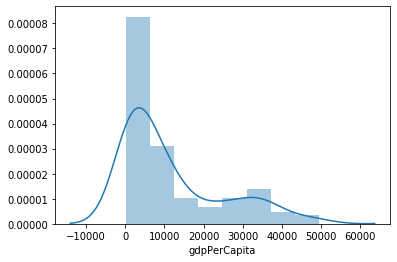

In [6]:
sns.distplot(countries_2007['gdpPerCapita']);

###### This shows, the GdpPerCapita is right skewed. Also there are 2 clusters.

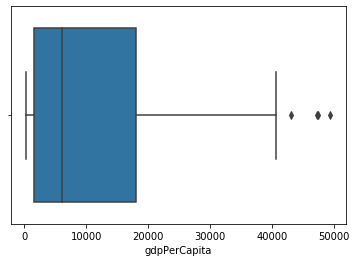

In [7]:
sns.boxplot(countries_2007['gdpPerCapita']);

In [8]:
countries_2007[countries_2007['gdpPerCapita']>41000]

,country,continent,year,lifeExpectancy,population,gdpPerCapita
863,Kuwait,Asia,2007,77.588,2505559,47306.98978
1151,Norway,Europe,2007,80.196,4627926,49357.19017
1367,Singapore,Asia,2007,79.972,4553009,47143.17964
1619,United States,Americas,2007,78.242,301139947,42951.65309


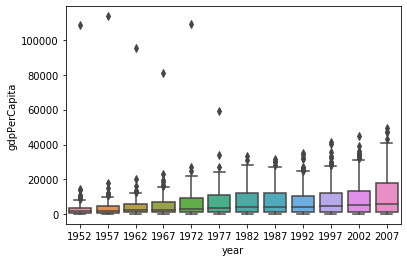

In [9]:
sns.boxplot(x='year',y ='gdpPerCapita',data=countries);

* The plots are right skewed 
* Quwet was very rich in the begining and was a outlier, then after quwet oil spill it became normal
* GDPPerCapita is increasing in the richer countries and same in the lesser as the medion is changing less
* Still, GDPPerCapita is increased a lot

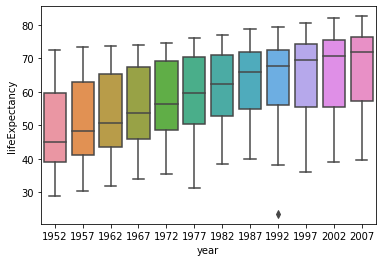

In [10]:
sns.boxplot(x='year',y ='lifeExpectancy',data=countries);

* left skewed ie.people are living longer
* 2007 if we take we can say majority have longer higher life expextency as the medion is high, 

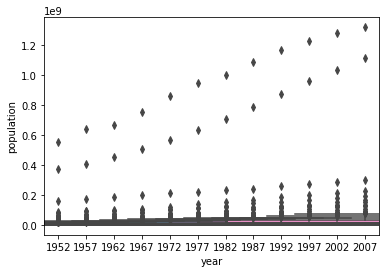

In [11]:
sns.boxplot(x='year',y ='population', data=countries, width=10);

* outliers are india and china, 
* if you see china is getting stabilized because of thier policies
* if we see india is it is increasing exponentially
* Also world population is also increasing

In [12]:
countries_2007.corr()

,year,lifeExpectancy,population,gdpPerCapita
year,NaN,NaN,NaN,NaN
lifeExpectancy,NaN,1.000000,0.047553,0.678662
population,NaN,0.047553,1.000000,-0.055676
gdpPerCapita,NaN,0.678662,-0.055676,1.000000


/Users/kashyap/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/kashyap/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


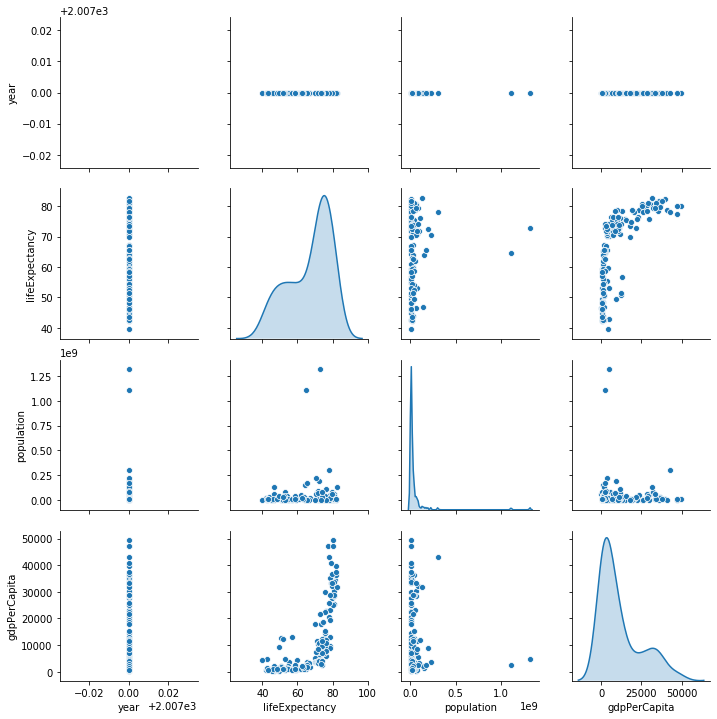

In [15]:
sns.pairplot(countries_2007,diag_kind='kde')

### Skew

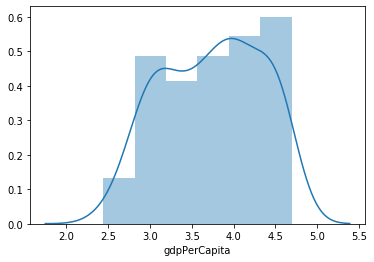

In [17]:
sns.distplot(np.sqrt(countries_2007['gdpPerCapita']));

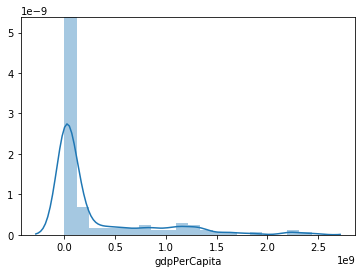

In [18]:
sns.distplot(np.sqrt(countries_2007['gdpPerCapita']));

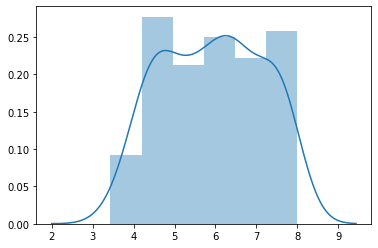

In [24]:
x,y = stats.boxcox(np.sqrt(countries_2007['gdpPerCapita']))
sns.distplot(x)